# Background
티사이언티픽과 GS글로벌은 비슷한 눌림돌파타점이다.  
그런데 결과는 다르다. 그 이유는 무엇일까?  
아마도 이전 분봉상 거래대금에서 차이가 날 것이다.   
유튜브: https://youtu.be/C6RSAKG5A9Y

# Import

In [155]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [156]:
df = pd.read_csv('data.csv')
df = df[df['주문일자'] == '2022-04-12']
df = df.reset_index(drop=True)
df

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사
0,2022-04-12,09:45:27,티사이언티픽,4505,-2.11,NaN,57680,20.78,22.65,14.08,1
1,2022-04-12,09:55:29,GS글로벌,4050,2.84,NaN,1250,13.92,24.89,5.34,1


# Preprocessing

In [157]:
max_money = []
min_money = []

for i in range(len(df)):
    df['체결시간'] = pd.to_datetime(df['체결시간'])
    date = df.iloc[i]['주문일자']
    firm = df.iloc[i]['종목명']
    time = df.iloc[i]['체결시간']

    frame = pd.read_csv(date+'_'+firm+'.csv')
    frame['시간'] = pd.to_datetime(frame['시간'])
    frame = frame[frame['시간'] < time]
    
    max_volume = frame['거래량'].max()
    min_volume = frame['거래량'].min()

    max_price = frame[frame['거래량'] == max_volume].reset_index(drop=True).iloc[0]['종가']
    min_price = frame[frame['거래량'] == min_volume].reset_index(drop=True).iloc[0]['종가']
    
    max_vp = max_volume * max_price
    min_vp = min_volume * min_price
    
    max_money.append(max_vp)
    min_money.append(min_vp)

In [158]:
df['최대거래대금(억)'] = max_money
df['최소거래대금(억)'] = min_money

In [159]:
df['최대거래대금(억)'] = df['최대거래대금(억)'].apply(lambda x : round(x / 100000000))
df['최소거래대금(억)'] = df['최소거래대금(억)'].apply(lambda x : round(x / 100000000))

In [160]:
df

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사,최대거래대금(억),최소거래대금(억)
0,2022-04-12,2022-04-13 09:45:27,티사이언티픽,4505,-2.11,NaN,57680,20.78,22.65,14.08,1,92,4
1,2022-04-12,2022-04-13 09:55:29,GS글로벌,4050,2.84,NaN,1250,13.92,24.89,5.34,1,182,3


# Visualization
눌림돌파가 성공한 GS글로벌은 최대거래대금이 약 200억원이고  
눌림돌파가 실패한 티사이언티픽은 최대거래대금이 약 100억원이다.  
최소거래대금은 비슷하다.

In [162]:
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

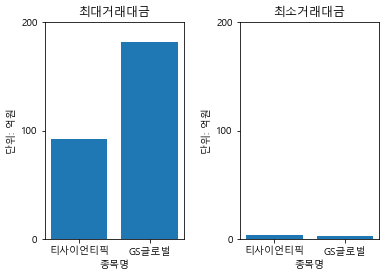

In [193]:
plt.subplot(1, 2, 1)
plt.bar(df.종목명, df['최대거래대금(억)'])
plt.title('최대거래대금')
plt.yticks([0,100,200])
plt.xlabel('종목명')
plt.ylabel('단위: 억원')

plt.subplot(1, 2, 2)
plt.bar(df.종목명, df['최소거래대금(억)'])
plt.title('최소거래대금')
plt.yticks([0,100,200])
plt.xlabel('종목명')
plt.ylabel('단위: 억원')

plt.subplots_adjust(wspace=0.4)
plt.show()

# Conclusion
1분봉 최대거래대금이 높을수록 매매성공률이 높을 가능성이 있다.